# OSE-Summer School 2019
## Wk5: Computation, Iterative Solvers

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import linalg as la
from random import randint
import time

### Problem 1

In [2]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [3]:
def jacobi_method_q1(A, b, tol=1e-10, maxiter=1000):
    
    if np.any(np.diag(A) == 0):
        raise ValueError("There is a zero in A's diagonal")
    elif A.shape[0] != A.shape[1]:
        raise ValueError("The lengths of row and column are different!")
    elif A.shape[0] != len(b):
        raise ValueError("The lengths of A and b are different!")
    else:
        it = 0
        diff = 10
        x = np.zeros((len(b), 1))
        xnew = np.zeros((len(b), 1))
        D_inv = np.diag(1/np.diag(A))
        while (diff > tol) and (it < maxiter):
            it += 1
            xnew = x + np.dot(D_inv, (b - np.dot(A, x)))
            diff = la.norm(xnew - x)
            x = xnew
            if it == maxiter:
                print("The maximum number of iterations is reached!")
                
    print("Iteration: %4d,   the difference: %6.5e" % (it, diff))
    
    return x    

In [4]:
n = randint(100, 10000)
b = np.random.random((n, 1))
A = diag_dom(n)
x = jacobi_method_q1(A, b, tol=1e-10, maxiter=1000)

Iteration:   17,   the difference: 9.34830e-11


In [5]:
# check the solution
np.allclose(np.dot(A,x), b)

True

### Problem 2

In [6]:
def jacobi_method_q2(A, b, plot=False, tol=1e-10, maxiter=1000):

    if np.any(np.diag(A) == 0):
        raise ValueError("There is a zero in A's diagonal")
    elif A.shape[0] != A.shape[1]:
        raise ValueError("The lengths of row and column are different!")
    elif A.shape[0] != len(b):
        raise ValueError("The lengths of A and b are different!")
    else:
        it = 0
        diff = 10
        x = np.zeros((len(b), 1))
        xnew = np.zeros((len(b), 1))
        D_inv = np.diag(1/np.diag(A))
        error = np.empty(0)
        while (diff > tol) and (it < maxiter):
            it += 1
            xnew = x + np.dot(D_inv, (b - np.dot(A, x)))
            diff = la.norm(xnew - x)
            error = np.append(error, la.norm(np.dot(A,xnew) - b))
            x = xnew
            if it == maxiter:
                print("The maximum number of iterations is reached!")
                
    print("Iteration: %4d,   the difference: %6.5e" % (it, diff))
    
    if plot:
        plt.semilogy(np.arange(it), error)
        plt.title("Convergence of Jacobi Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
    
    return x   

Iteration:   17,   the difference: 7.27344e-11


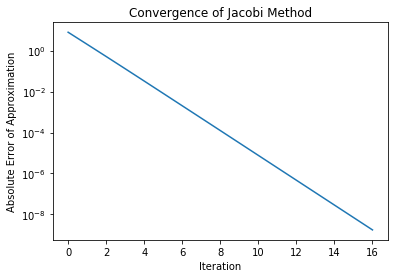

In [7]:
n = randint(100, 10000)
b = np.random.random((n, 1))
A = diag_dom(n)
x = jacobi_method_q2(A, b, plot=True, tol=1e-10, maxiter=1000)

### Problem 3

In [8]:
def gauss_seidel_method(A, b, plot=False, tol=1e-10, maxiter=1000):
    
    if np.any(np.diag(A) == 0):
        raise ValueError("There is a zero in A's diagonal")
    elif A.shape[0] != A.shape[1]:
        raise ValueError("The lengths of row and column are different!")
    elif A.shape[0] != len(b):
        raise ValueError("The lengths of A and b are different!")
    else:
        it = 0
        diff = 10
        x = np.zeros((len(b),1))
        xnew = np.zeros((len(b),1))
        error = np.empty(0)
        
        while (diff > tol) and (it < maxiter):
            it += 1
            for i in range(len(x)):
                xnew[i] = x[i] + (1/A[i,i])*(b[i] - np.dot(np.transpose(A[i,:]), xnew))
            diff = la.norm(xnew - x)
            error = np.append(error, la.norm(np.dot(A,xnew) - b))
            x = np.copy(xnew)
            if it == maxiter:
                print("The maximum number of iterations is reached!")
                
    print("Iteration: %4d,   the difference: %6.5e" % (it, diff))
    if plot:
        plt.semilogy(np.arange(it), error)
        plt.title("Convergence of Jacobi Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        
    return x

In [9]:
n = randint(100, 10000)
b = np.random.random((n, 1))
A = diag_dom(n)
x = gauss_seidel_method(A, b, tol=1e-10, maxiter=1000)
np.allclose(np.dot(A,x),b)

Iteration:   11,   the difference: 5.70943e-11


True

In [10]:
# Jacobi method vs Gauss-Seidel method
A = np.array([[2,0,-1],[-1,3,2],[0,1,3]])
b = np.array([[3],[3],[-1]])
x_jacobi = jacobi_method_q2(A,b)
x_gauss = gauss_seidel_method(A,b)
np.allclose(x_jacobi, x_gauss)

Iteration:   40,   the difference: 5.68100e-11
Iteration:   15,   the difference: 4.63531e-11


True

### Problem 4

In [11]:
from scipy import sparse

def gauss_seidel_sparse(A, b, tol=1e-10, maxiter=1000):
    
    if A.shape[0] != A.shape[1]:
        raise ValueError("The lengths of row and column are different!")
    elif A.shape[0] != len(b):
        raise ValueError("The lengths of A and b are different!")
    else:
        it = 0
        diff = 10
        x = np.zeros((len(b),1))
        xnew = np.zeros((len(b),1))
        
        while (diff > tol) and (it < maxiter):
            it += 1
            for i in range(len(x)):
                rowstart = A.indptr[i]
                rowend = A.indptr[i+1]
                Aix = A.data[rowstart:rowend] @ xnew[A.indices[rowstart:rowend]]
                xnew[i] = x[i] + (1/A[i,i])*(b[i] - Aix)
            diff = la.norm(xnew - x)
            x = np.copy(xnew)
            if it == maxiter:
                print("The maximum number of iterations is reached!")
                
    print("Iteration: %4d,   the difference: %6.5e" % (it, diff))
        
    return x

In [12]:
A = sparse.csr_matrix(diag_dom(10000))
b = np.random.random((10000,1))

start = time.time()
x = gauss_seidel_sparse(A,b)
end = time.time()
print("Elapsed = %4.2f seconds" % (end - start))

# check the solution
np.allclose(A @ x, b)

Iteration:   11,   the difference: 5.51708e-11
Elapsed = 3.13 seconds


True

### Problem 5

In [13]:
def successive_over_relaxation(A, b, w=1, tol=1e-10, maxiter=1000):
    '''
    if w=1, it is equivalent to Gauss-Seidel Sparse Method
    '''
    
    if A.shape[0] != A.shape[1]:
        raise ValueError("The lengths of row and column are different!")
    elif A.shape[0] != len(b):
        raise ValueError("The lengths of A and b are different!")
    else:
        it = 0
        diff = 10
        x = np.zeros((len(b),1))
        xnew = np.zeros((len(b),1))
        
        while (diff > tol) and (it < maxiter):
            it += 1
            for i in range(len(x)):
                rowstart = A.indptr[i]
                rowend = A.indptr[i+1]
                Aix = A.data[rowstart:rowend] @ xnew[A.indices[rowstart:rowend]]
                xnew[i] = x[i] + (w/A[i,i])*(b[i] - Aix)
            diff = la.norm(xnew - x)
            x = np.copy(xnew)
            if it == maxiter:
                print("The maximum number of iterations is reached!")
                
    print("Iteration: %4d,   the difference: %6.5e" % (it, diff))
        
    return (x, it)

In [14]:
A = sparse.csr_matrix(diag_dom(10000))
b = np.random.random((10000,1))

start = time.time()
x, it = successive_over_relaxation(A,b,w=1.1)
end = time.time()
print("Elapsed = %4.2f seconds" % (end - start))

# check the solution
np.allclose(A @ x, b)

Iteration:   13,   the difference: 8.78637e-11
Elapsed = 3.58 seconds


True

### Problem 6

In [15]:
def finite_diff_method(n: int, w, tol=10e-8, maxiter=100, plot=False):
    
    # construct the matrix A    
    A = np.eye(n*n)*(-4) + np.eye(n*n, k=1) + np.eye(n*n, k=-1) + \
        np.eye(n*n, k=-n) + np.eye(n*n, k=n)
    for i in range(1,n):
        A[n*i-1, n*i] = 0
        A[n*i, n*i-1] = 0
    A = sparse.csr_matrix(A)
    
    # construct the vector b
    b = np.zeros((n,1))
    b[0] = -100
    b[n-1] = -100
    b = np.tile(b, (n,1))
    
    #u, it = gauss_seidel_method(A, b, tol=tol, maxiter=maxiter)
    u, it = successive_over_relaxation(A, b, w=w, tol=tol, maxiter=maxiter)
    
    if plot:
        plt.pcolormesh(np.reshape(u,(n,n)), cmap='coolwarm')
        
    return u, it

Iteration:  953,   the difference: 9.86970e-09


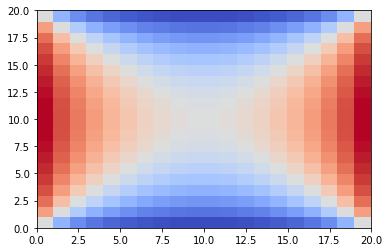

In [16]:
u, it = finite_diff_method(20, 1, tol=1e-8, maxiter=1000, plot=True)

### Problem 7

Iteration:  338,   the difference: 9.86841e-03
Iteration:  310,   the difference: 9.79437e-03
Iteration:  284,   the difference: 9.74669e-03
Iteration:  259,   the difference: 9.95433e-03
Iteration:  237,   the difference: 9.75825e-03
Iteration:  216,   the difference: 9.68568e-03
Iteration:  196,   the difference: 9.71091e-03
Iteration:  177,   the difference: 9.80116e-03
Iteration:  159,   the difference: 9.90796e-03
Iteration:  142,   the difference: 9.95391e-03
Iteration:  126,   the difference: 9.81343e-03
Iteration:  111,   the difference: 9.28783e-03
Iteration:   95,   the difference: 9.86045e-03
Iteration:   80,   the difference: 9.61127e-03
Iteration:   64,   the difference: 9.72316e-03
Iteration:   46,   the difference: 7.50638e-03
Iteration:   55,   the difference: 8.39072e-03
Iteration:   76,   the difference: 9.18191e-03
Iteration:  109,   the difference: 7.91360e-03
Iteration:  214,   the difference: 9.38703e-03

the optimal relaxation factor w is 1.75


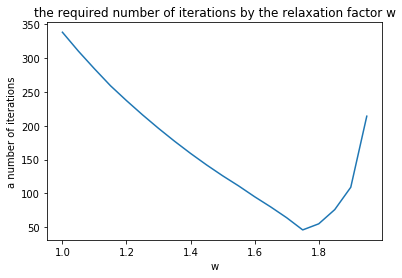

In [19]:
nw = 20
w_set = np.linspace(1, 1.95, nw)
iteration = np.zeros(nw)
n = 20

for i, w in enumerate(w_set):
    u, it = finite_diff_method(n, w, tol=1e-2, maxiter=1000)
    iteration[i] = it
    
plt.plot(w_set, iteration)
plt.xlabel("w")
plt.ylabel("a number of iterations")
plt.title("the required number of iterations by the relaxation factor w")

print("")
print("the optimal relaxation factor w is %1.2f" % w_set[iteration.argmin()])

### End